# Introduction to databases in Python
You'll learn how to handle data files in python

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table of contents
0. [File Formats](#Medical-data-file-formats)
1. [Initial_Setup](#Medical-data-file-formats)
2. [XML](#XML)
    - [XML_to_Dataframe](#Converting-xml-to-pandas-dataframe)
3. [RD](#RD)
4. [EDF](#EDF)
5. [BDF](#BDF)
6. [CSV](#CSV)
7. [XLSX](#XLSX)

## Medical data file formats
| Format Name | File Extension | Origin                                         |
|-------------|----------------|------------------------------------------------|
| XML         | .xml           | Extensible Markup Language                     |
| RD          | .rd            | R Documentation                                |
| EDF         | .edf           | European Data Format                           |
| BDF         | .bdf           | BioSemi Data Format                            |
| CSV         | .csv           | Comma Separated Values                         |
| XLSX        | .xlsx          | Microsoft Excel Spreadsheet                    |

## Initial Setup
Mostly, medical files are shared as .gz or tar.gz files, which are compressed files containing medical data files with the formats in the table above.
<br>
To read a .gz file, you can use open function from python gzip module.
<br>
To read a tar.gz file, you can use open function from python tarfile module or unpack_archive function from shutil.

In [26]:
import tarfile
tar = tarfile.open('Data/smni_eeg_data/a_1_co2a0000364.tar.gz', "r:gz")
tar.extractall()
tar.close()
print(tar)

In [27]:
import shutil
shutil.unpack_archive('Data/smni_eeg_data/a_1_co2a0000364.tar.gz', 'Data/smni_eeg_data')

In [28]:
import gzip
fc = gzip.open('Data/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.000.gz', 'rb')

In [89]:
import os

import gzip

sleepdata_path='Data/smni_eeg_data/'
for tar_filename in os.listdir(sleepdata_path):
     if 'tar.gz' in tar_filename: 
        shutil.unpack_archive(sleepdata_path+tar_filename,sleepdata_path)
        
        for gz_filename in os.listdir(sleepdata_path+tar_filename.split('.')[0]):
            
            with gzip.open(sleepdata_path+tar_filename.split('.')[0]+'/'+gz_filename, 'rb') as f_in:
                
                with open(sleepdata_path+tar_filename.split('.')[0]+'/'+gz_filename.split('.gz')[0], 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)

## XML
To read an XML file, you can use the parse function from python XML parsing module, which returns a Dataset object containing the data from the XML file.
Parsing means to read information from a file and split it into pieces

In [79]:
from xml.etree import ElementTree as ET # Parse XML file in a tree structure

# parse an xml file by name
file = ET.parse('Data/naaccr-xml-sample-v210-abstract-10.xml')

# What main data our file has?
root=file.getroot() # fetch the root element of the file
print('root element of your file is:', root)
print('tag of the root element is:',root.tag)      # the data we have-->NaaccrData

print() # print new line
# What is the subselement of each root? 
print('First subelement of each root is;',root[0].tag)  # patient
print('number of patients is',len(root))    # how many patients 
for x in root: # for all root subelements
    print(x.tag, x.attrib) # print each subelement's tag , attribute
print()

# What is the first subselement of each data? 
print('First subelement of each patient is;',root[0][0].tag)  # Item
print('number of Items for each patient is',len(root[0]), ': 21 Items and 1 Tumor')    # how many Items for each patient 
for x in root[0]: # for all patient subelements
    print(x.tag, x.attrib) # print each subelement's tag , attribute
    
for x in root[0]:
    if len(x)!=0:
        print(len(x),'Items for each Tumor subelement:')
        for y in x:
            print(y.tag, y.attrib)

root element of your file is: <Element '{http://naaccr.org/naaccrxml}NaaccrData' at 0x000001C6E1CF04F0>
tag of the root element is: {http://naaccr.org/naaccrxml}NaaccrData

First subelement of each root is; {http://naaccr.org/naaccrxml}Patient
number of patients is 10
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}
{http://naaccr.org/naaccrxml}Patient {}

First subelement of each patient is; {http://naaccr.org/naaccrxml}Item
number of Items for each patient is 22 : 21 Items and 1 Tumor
{http://naaccr.org/naaccrxml}Item {'naaccrId': 'nhiaDerivedHispOrigin'}
{http://naaccr.org/naaccrxml}Item {'naaccrId': 'raceNapiia'}
{http://naaccr.org/naaccrxml}Item {'naaccrId': 'nameMiddle'}
{ht

### Converting xml to pandas dataframe

In [84]:
from xml.etree import ElementTree as ET # Parse XML file in a tree structure
import pandas as pd
import numpy as np

# parse an xml file by name
file = ET.parse('Data/naaccr-xml-sample-v210-abstract-10.xml')
root=file.getroot() # fetch the root element of the file
#mldict = XmlDictConfig(root)

#for x in root.iter():
    #print(x)
def xml2df(root):
    all_records=[]
    
    for i, child in enumerate(root): #patient
        record={}
        my_dict={}
        values=[]
        for subchild in child:
            #print(subchild)
            values.append(subchild.tag.split('}')[1])
            #for i in len(np.unique(values)):
                #print(list(np.unique(values))[i])
            for key in list(np.unique(values)):
                my_dict[key]=values.count(key)
            record[child.tag.split('}')[1]]=my_dict
        #print(record)      
        all_records.append(record)
    return pd.DataFrame(all_records)

df=xml2df(root)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Patient
0,"{'Item': 21, 'Tumor': 1}"
1,"{'Item': 21, 'Tumor': 1}"
2,"{'Item': 21, 'Tumor': 1}"
3,"{'Item': 21, 'Tumor': 1}"
4,"{'Item': 24, 'Tumor': 1}"


## RD
To read an RD file, you can use the TextIOWrapper function from python io module
and then read and save it as a Data Frame by using python Pandas module.
In the following we call EEG_load_function.py in which import_eeg_file reads the .rd file.

In [91]:
import gzip
import seaborn as sn
import matplotlib.pyplot as plt
from pyprojroot import here
from Utilities.EEG_load_function import import_eeg_file

# Import data from one trial from participant 338 in control group
fc = gzip.open('Data/SMNI_CMI_TRAIN/co2c0000347/co2c0000347.rd.000.gz', 'rb')
dfc = import_eeg_file(fc)
print(type(dfc)) # Pandas Data Frame

dfc.head()

<class 'pandas.core.frame.DataFrame'>


subject   co2c0000347                                                          \
trial               0                                                           
alcoholic       False                                                           
match             obj                                                           
err             False                                                           
sensor            AF1    AF2    AF7    AF8    AFZ     C1     C2     C3     C4   
sample                                                                          
0              -1.953 -4.517  1.862 -1.251 -2.502  0.214 -0.916  2.167 -0.875   
1              -3.418 -3.540  1.373  2.655 -3.967  0.214 -0.427  1.678 -0.387   
2              -4.395 -2.563  1.373  4.120 -3.967 -0.275 -1.404  1.678 -0.875   
3              -3.906 -3.052  1.862  2.167 -3.967 -0.275 -1.892  0.702 -2.340   
4              -3.418 -3.540  2.350  0.214 -3.479 -0.275 -2.380  0.702 -2.828   

subject           ...                                                   \
trial             ...                                                    
alcoholic         ...                                                    
match             ...                                                    
err               ...                                                    
sensor        C5  ...    PO8    POZ     PZ     T7     T8    TP7    TP8   
sample            ...                                                    
0          5.412  ...  0.885 -2.574 -2.848  6.978  2.228  4.852  2.706   
1          4.924  ...  0.397 -2.085 -2.360  6.978  1.740  4.852  1.729   
2          3.947  ... -0.580 -2.085 -2.848  5.514  1.251  4.364 -0.224   
3          1.994  ... -1.068 -2.574 -3.337  4.049  1.251  3.876 -1.200   
4          1.506  ... -0.092 -2.085 -3.337  3.072  2.228  4.852 -0.712   

subject                             
trial                               
alcoholic                           
match                               
err                                 
sensor             X      Y     nd  
sample                              
0          19.999001  8.606 -0.346  
1          10.234000  6.653  0.142  
2          -8.321000  4.211  0.631  
3         -25.899000  2.258  1.119  
4         -29.806000  3.235  2.096  

[5 rows x 64 columns]

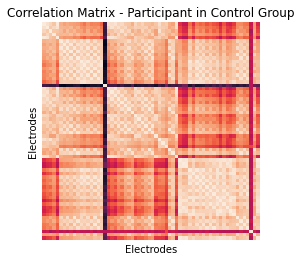

In [86]:
# correlation matrix for partcipant
corrMatrix_c = dfc.corr()
ax = plt.axes()
sn.heatmap(corrMatrix_c,
           cbar=False,
           square=True,
           xticklabels=False,
           yticklabels=False,
           ax = ax
           )
ax.set_title('Correlation Matrix - Participant in Control Group')
ax.set_xlabel('Electrodes') # x-axis label with fontsize 15
ax.set_ylabel('Electrodes') # y-axis label with fontsize 15

plt.show()

## EDF
To read an EDF file, you can use the read_raw_edf function from python mne.io module

In [20]:
import mne
raw = mne.io.read_raw_edf('Data/test_generator.edf').load_data()
print()
print('Information of the data is:',raw.info)

Extracting EDF parameters from C:\Users\nasta\OneDrive\Dokumente\GitHub\python-bootcamp\notebooks\Datamanagement\Data\test_generator.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 179999  =      0.000 ...   899.995 secs...

Information of the data is: <Info | 8 non-empty values
 bads: []
 ch_names: F4, F3, X10, FP2, P4, C4, P3, C3, X9, FP1, F8, F7, DC01, DC04, ...
 chs: 16 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2008-10-02 14:27:00 UTC
 nchan: 16
 projs: []
 sfreq: 200.0 Hz
 subject_info: 1 item (dict)
>


## BDF
To read a BDF file, you can use BDF function from python biosemipy module
#git clone https://github.com/igmmgi/biosemipy.git
#pip install -e biosemipy

In [1]:
from biosemipy import bdf
import pandas as pd
import io

dat1 = bdf.BDF("Data/BDFtestfiles/Newtest17-256.bdf")
print(type(dat1))


<class 'biosemipy.bdf.BDF'>


## CSV
To read a csv file, you can use read_csv function from python Pandas module

In [13]:
import pandas as pd
dat2=pd.read_csv("Data/Data_Entry_2017.csv")
print(type(dat2))
dat2.head()

<class 'pandas.core.frame.DataFrame'>


,Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


## XLSX
To read an xlsx file, you can use read_excel function from python Pandas module

In [24]:
dat3 = pd.read_excel("Data/ESAC-Net_report_2021_downloadable_tables.xlsx",sheet_name='D1_J01A_AC',skiprows=1)
print(type(dat3))
dat3.head()

<class 'pandas.core.frame.DataFrame'>


C:\Users\nasta\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


,Country name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Time series\n2012-2021,Trend,Compound annual growth rate (CAGR)
0,Austria,1.0811,1.2715,1.0630,0.9867,0.8552,0.6303,0.3634,0.317269,0.2789,0.338315,NaN,↓,-0.121100
1,Belgium,2.1101,2.1607,2.1000,2.0341,1.9940,1.9161,1.8735,1.861300,1.6286,1.809078,NaN,↓,-0.016957
2,Bulgaria,1.7702,1.7590,1.7934,1.7009,1.6783,1.6337,1.6176,1.681700,2.1863,2.559688,NaN,-,0.041828
3,Croatia,1.1858,1.1919,1.1234,1.1426,1.0235,0.9952,0.9792,0.928000,0.7900,0.978971,NaN,↓,-0.021072
4,Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import io
from xml.etree import ElementTree as ET # Parse XML file in a tree structure

# parse an xml file by name
file = ET.parse('Data/naaccr-xml-sample-v210-abstract-10.xml')

data = 'Data/naaccr-xml-sample-v210-abstract-10.xml'

#tree = xml.etree.parse(file)
#df = pd.read_xml(io.StringIO(file))
#cols=['Patient']
df = pd.read_xml(io.TextIOWrapper('Data/naaccr-xml-sample-v210-abstract-10.xml'))
print(df)